In [34]:
%cd C:\Users\yukir\Documents\GitHub\Text_Mining\py

from nlp_processing import *
from text_preprocessing import *
set_global_determinism(seed=1337)

%cd C:\Users\yukir\Documents\Monicas_workspace\mega_trend

C:\Users\yukir\Documents\GitHub\Text_Mining\py
C:\Users\yukir\Documents\Monicas_workspace\mega_trend


Text(0.5, 1.0, '안녕')

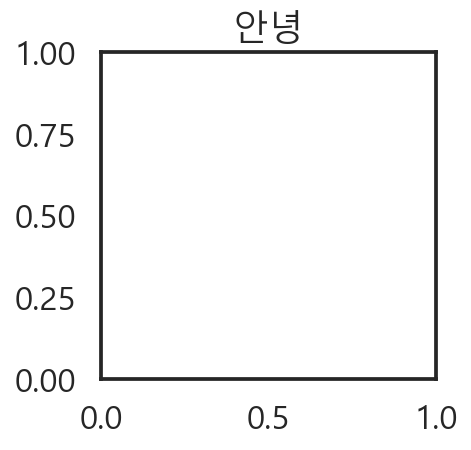

In [35]:
plt.figure(figsize = (3,3))
plt.rc('font', family='Malgun Gothic') 
%config InlineBackend.figure_format = 'retina'
plt.title("안녕")

In [36]:
from nltk.corpus import stopwords  
stopwords.words('korean')[:10] 

stopwords_kor = stopwords.words('korean')

In [37]:
from tqdm import tqdm
import os
import sys

In [38]:
from konlpy.tag import Okt
okt = Okt()

In [39]:
def clean_text(text): 
    """ 한글, 영문, 숫자만 남기고 제거한다. 
    :param text: 
    :return: 
    """ 
    text = text.replace(".", " ").strip() 
    text = text.replace("·", " ").strip()
    pattern = '[^ ㄱ-ㅣ가-힣|0-9|a-zA-Z]+' 
    text = re.sub(pattern=pattern, repl='', string=text) 
    return text 
    
def get_nouns(tokenizer, sentence): 
    """ 단어의 길이가 2이상인 일반명사(NNG),
     고유명사(NNP), 외국어(SL)만을 반환한다. 
     :param tokenizer: 
     :param sentence: :return: """ 
    tagged = tokenizer.nouns(sentence)
    nouns = [s for s in tagged if len(s)>1] 
     
    return nouns 
     
def tokenize(clean_example): 
    tokenizer = okt
    processed_data = [] 
    for sent in tqdm(clean_example):
        sentence = clean_text(sent.replace('\n', '').strip()) 
        processed_data.append(get_nouns(tokenizer, sentence)) 
        
    return processed_data
    
    
def save_processed_data(processed_data): 
    """ 토큰 분리한 데이터를 csv로 저장 :param processed_data: :return: """ 
    
    with open('tokenized.csv', 'w', newline='', encoding='utf-8') as f: 
        writer = csv.writer(f) 
        for data in processed_data:
             writer.writerow(data)

### DATA LOAD

In [40]:
### 레이블링 된 자료를 가지고, 필요한 주제 넣어서 진행(그냥하면 어려울 수도 있음)
 
 
f = open('C:\\Users\\yukir\\Documents\\Monicas_workspace\\mega_trend\\0214_pre.txt')
lines=f.readlines()

clean_example = []

for i in tqdm (lines):
    k = clean_text(i)
    # text = re.sub('\n','',k)
    # print(text)
    k = k.strip()
    k = k.replace('\n','')
    p = re.compile("[^0-9]")
    k = ("".join(p.findall(k)))
    if k==[] or '':
        pass
    elif k=='':
        pass
    elif len(k)<=2:
        pass
    elif '제약' in k:  ##########주제정할때 사용#################
        clean_example.append(k)##########주제정할때 사용#################
    # else:   ##########주제 필요 없을때 사용#################
    #     clean_example.append(k)

len(clean_example)

100%|██████████| 1514/1514 [00:00<00:00, 100659.04it/s]


57

In [41]:
## 오래걸리니까 조심
def tokenize(clean_example): 
    tokenizer = okt
    processed_data = [] 
    for sent in tqdm(clean_example):
        sentence = clean_text(sent.replace('\n', '').strip()) 
        processed_data.append(get_nouns(tokenizer, sentence)) 
        
    return processed_data
        
def save_processed_data(processed_data): 
    """ 토큰 분리한 데이터를 csv로 저장 :param processed_data: :return: """ 
    
    with open('211tokenized_TFIDF.csv', 'w', newline='', encoding='utf-8') as f: 
        writer = csv.writer(f) 
        for data in processed_data:
             writer.writerow(data)


from tqdm import tqdm 
if __name__ == '__main__':
     # df = pd.read_csv('negative.csv', index_col = 0)
     processed_data = tokenize(clean_example) # description 부분을 토크나이징 한다. 
     
     # 토큰 분리한 데이터를 저장 
     save_processed_data(processed_data)

100%|██████████| 57/57 [00:00<00:00, 712.49it/s]


### TF_IDF

In [42]:
clean_example[:10]

['제약기술',
 '제약기술 전통적인 화학 화합물소분자 및 분자 클래스의 새로운 반복은 다중 및 동시표적 구조와 같은 의약품으로 사용 가능',
 '제약기술 사례세놀리틱스와 세포 노화 조절  세포 노화는 약물개발이 가능하지 않은 피할 수 없는 생리적 과정으로 간주됨  그러나 세놀리틱스는 세포 염증 기능 장애 및 조직 손상을 유발할 수 있는 노화 세포를 감소시키거나 제거가 가능',
 '제약및바이오테크',
 '제약기술신종희귀질환및항암제 소분자 약물 및 항체 외에도 희귀질환에 대한 다양한 신약 유형이 존재',
 '제약기술 신종희귀질환및항암제 바이러스 벡터기반 치료법은 암 전염병 및 희귀 유전질환 치료법으로 부상',
 '인공지능 많은 바이오 제약 및 의료기술 회사들이 인공지능을 사용해 신약 발견 및 개발 기능을 간소화하고 최적화',
 '인공지능 제약약물 개발 및 임상시험',
 '제약기술 제약발견 등',
 '블록체인  그러나 규제의 불확실성 블록체인 기술의 미래 확장성 제한된 상업화로 인한 증명되지 않은 가치 및 헬스케어 산업의 신기술에 대한 타성 등이 시장 성장의 제약 요인']

In [43]:
detokenized_doc = []
for i in range(len(processed_data)):
    t = ' '.join(processed_data[i])
    try: 
        if '인공 지능' in t:
            t = t.replace('인공 지능', '인공')
            detokenized_doc.append(t)
        elif '지능' in t:
            pass
        elif '오믹스 분자 기술' in t:
            t = t.replace('오믹스 분자 기술', '오믹스분자기술')
            detokenized_doc.append(t)
        elif '제약 기술' in t:
            t = t.replace('제약 기술', '제약기술')
            detokenized_doc.append(t)
        else:
            detokenized_doc.append(t)

    except:
        detokenized_doc.append(t)
    

import pandas as pd
df = pd.DataFrame({'detokenized_doc':detokenized_doc})
df = df.dropna()
print(df.shape)
df.head()

#df 내용 수시로 확인하면서 띄어쓰기 처리할 것

(57, 1)


,detokenized_doc
0,제약기술
1,제약기술 전통 화학 화합물 분자 분자 클래스 반복 다중 동시 표적 구조 의약품 사용 가능
2,제약기술 사례 틱스 세포 노화 조절 세포 노화 약물 개발 생리 과정 간주 세놀리틱스...
3,바이오 테크
4,기술 신종 희귀질환 항암제 분자 약물 항체 희귀질환 대한 신약 유형 존재


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word',       
                             min_df=0,                        # minimum reqd occurences of a word 
                             stop_words=stopwords_kor,             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[가-힣0-9]{1,}',  # num chars > 3
                             max_features=2000,             # max number of uniq words
                            ) 
data_vectorized = vectorizer.fit_transform(df['detokenized_doc'])
data_vectorized.shape # TF-IDF 행렬의 크기 확인

(57, 213)

In [45]:
feature_vector = vectorizer.fit_transform(detokenized_doc)
print(feature_vector.shape)
vocab = vectorizer.get_feature_names()
print(len(vocab))


(57, 213)
213


In [46]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알 수 있습니다.
# 벡터화 된 피처를 확인해 봄
# Bag of words 에 몇 개의 단어가 들어있는지 확인
# 
dist = np.sum(feature_vector, axis=0)
    
df_freq = pd.DataFrame(dist, columns=vocab)
print(df_freq.shape)
# df_freq.to_excel('df_freq.xlsx', encoding= 'utf-8')

(1, 213)


In [47]:
# 행과 열의 축을 T로 바꿔주고 빈도수로 정렬합니다.
df_freq.T.sort_values(by=0, ascending=False)

,0
제약,6.832826
바이오,6.806704
제약기술,6.242355
세포,3.680020
서비스,3.489487
...,...
프로그래밍,0.185096
파괴,0.185096
공격,0.185096
주입,0.185096


In [48]:
# ["course", "freq"] 라는 컬럼명을 주어 위에서 만든 데이터프레임을 변환합니다.
df_freq_T = df_freq.T.reset_index()
df_freq_T.columns = ["words", "freq"]
df_freq_T.tail()
# df_freq_T.to_excel('df_freq_T.xlsx', encoding= 'utf-8')

,words,freq
208,회복,0.663583
209,회사,0.910905
210,후보,0.477256
211,희귀,0.273295
212,희귀질환,1.063208


In [49]:
# 3개의 ngram과 빈도수로 역순 정렬을 하게 되면 빈도수가 높고, ngram수가 많은 순으로 정렬이 됨 
# 여기에서 drop_duplicates로 중복을 삭제 합니다.
print(df_freq_T.shape)
df_use = df_freq_T.drop_duplicates()
print(df_use.shape)

(213, 2)
(213, 2)


In [50]:
# 빈도수로 정렬을 하고 어떤 강좌가 댓글에서 가장 많이 언급되었는지 봅니다.
df_use = df_use.sort_values(by="freq", ascending=False)
df_use

,words,freq
141,제약,6.832826
55,바이오,6.806704
142,제약기술,6.242355
89,세포,3.680020
85,서비스,3.489487
...,...,...
193,프로그래밍,0.185096
191,파괴,0.185096
20,공격,0.185096
153,주입,0.185096


In [51]:
#저장 후 확인하면서 관련 질환 육안 extraction필요

df_use.to_excel('terms_frequency.xlsx', encoding='utf-8')

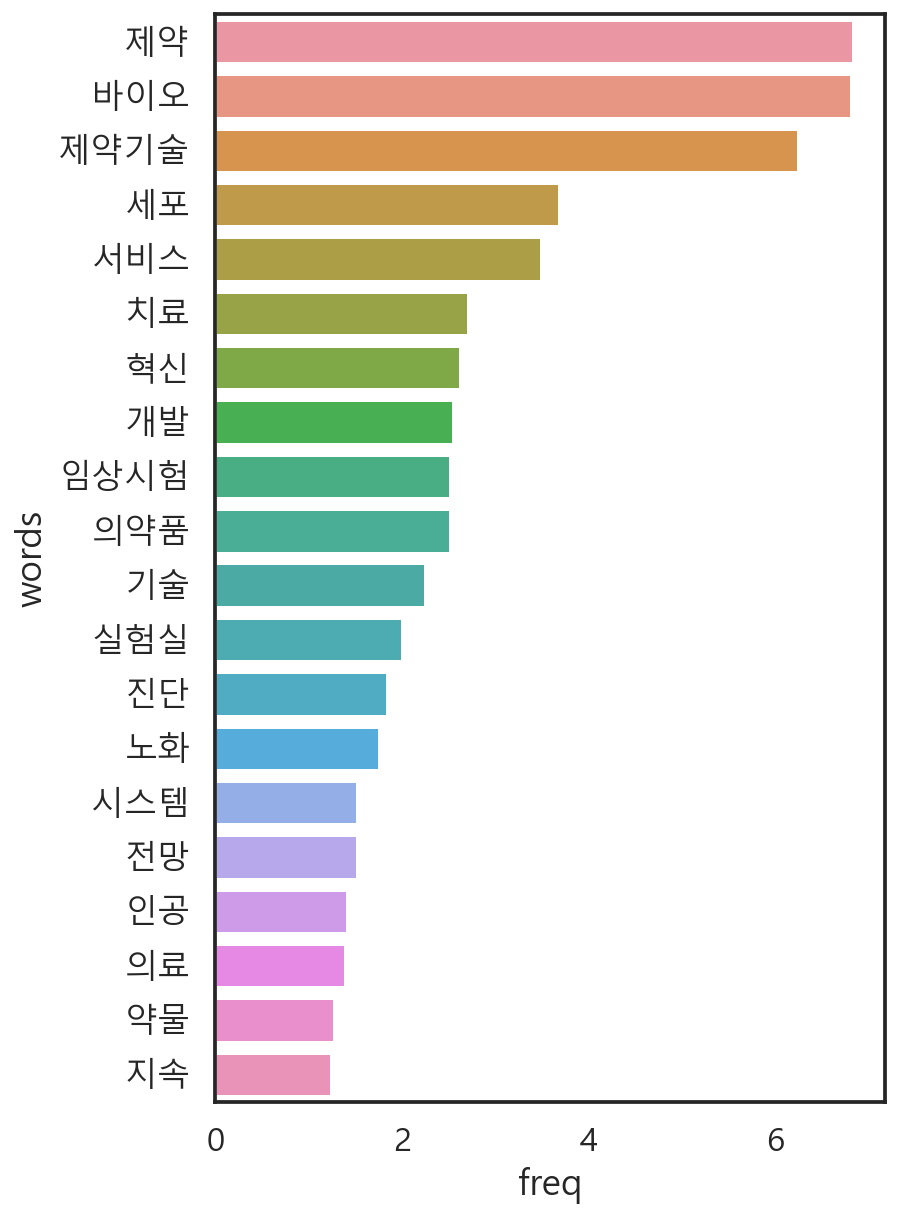

In [52]:
import seaborn as sns
plt.rc('font', family='Malgun Gothic') 

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(6,10))
ax = sns.barplot(x = 'freq', y = 'words', 
                 data = df_use.sort_values(by = 'freq', 
                                               ascending = False).head(20))
# ax.set(xlabel = 'Overall', ylabel = 'Pokemon')
# plt.savefig('covid2_frequency.png')
plt.show()


### WORD CLOUD

In [53]:
words_v2 = []

for num, i in enumerate (df_use.words):
#   try:
#     if '화이트' in i:
#       pass
#     elif '하니' in i:
#       pass
#     elif '줄평' in i:
#       pass
#     elif '군데' in i:
#       pass
#     else :
    words_v2.append((i, int(df_use.freq[num])))
#   except: 
#     pass
    
    # words_v2.append((i, int(df_use.freq[num])))
  # words_v2.append((i, int(df_use.freq[num])))

words_v2[:5]
words_clean = words_v2.copy()

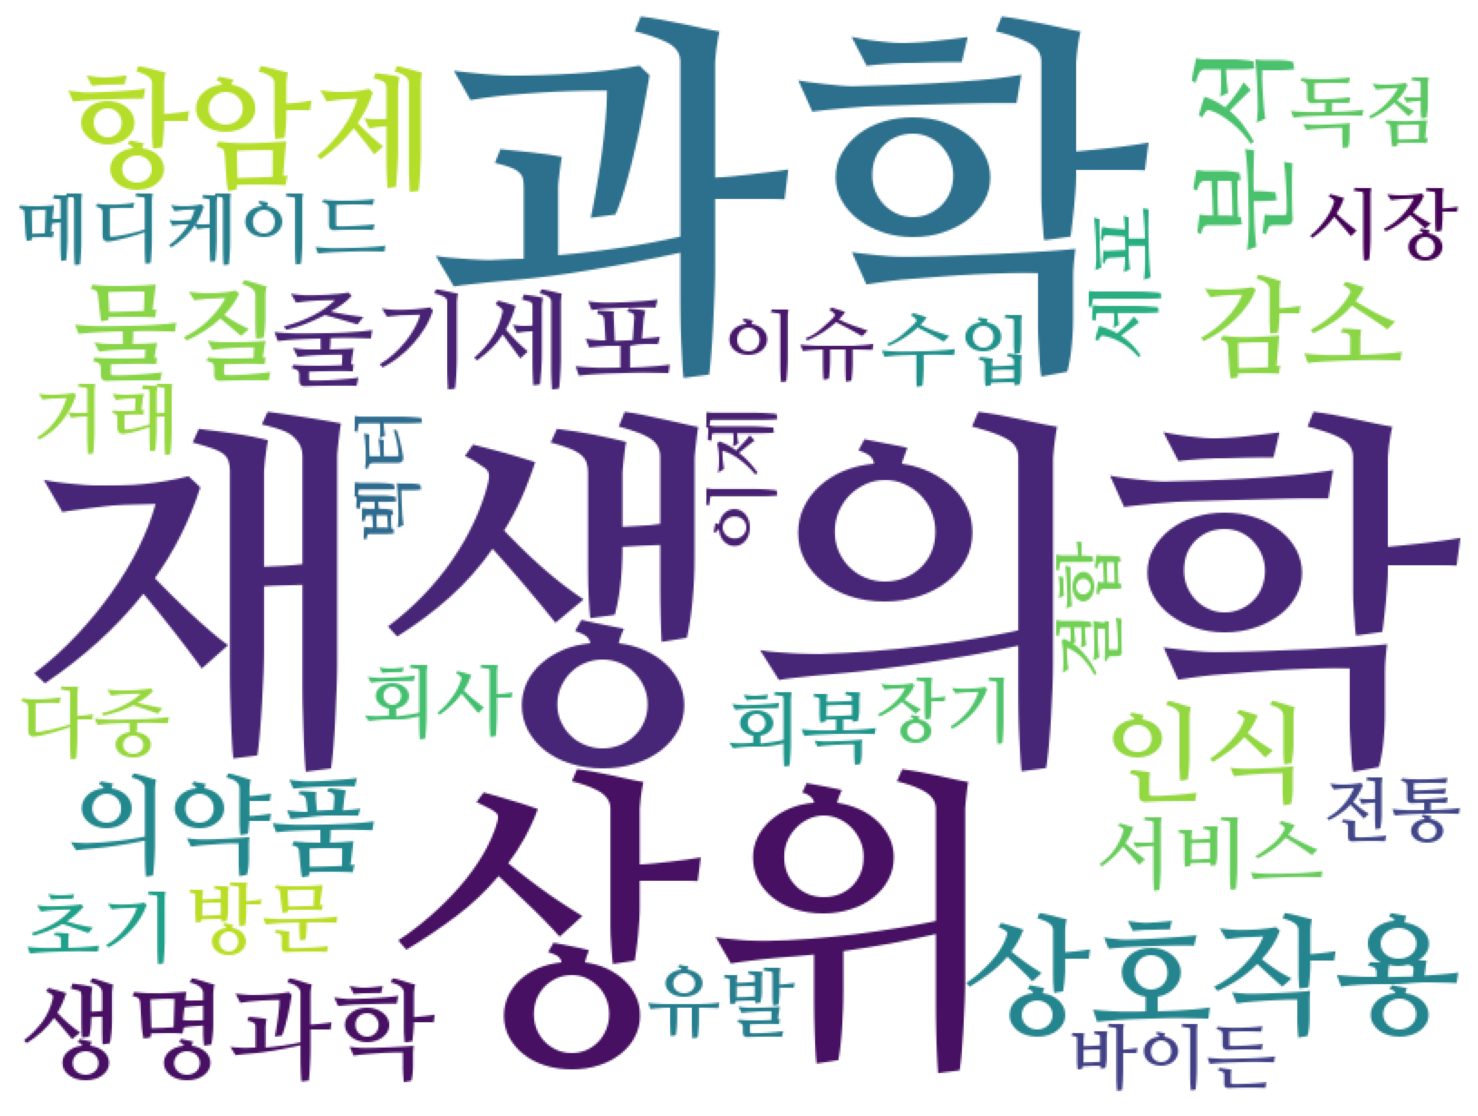

In [54]:
from apyori import apriori
#불용어
from wordcloud import STOPWORDS
from wordcloud import WordCloud

from nltk.corpus import stopwords  
stopwords_kor = stopwords.words('korean')

#워드클라우드. #폰트 경로설정 가장 중요


wordcloud = WordCloud(font_path="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Korea_medicine\\NanumMyeongjoBold.ttf",
                      stopwords = stopwords_kor,
                      background_color='white',
                      width=800,
                      height=600)

# print(dict(words_v2))

cloud = wordcloud.generate_from_frequencies(dict(words_clean))
plt.figure(figsize=(15, 10))
plt.axis('off')

plt.imshow(cloud)
plt.show()
# plt.savefig('seoul_less6.png')

###나오는 워드클라우드보고 stopwords_kor설정

### NETWORK

In [71]:
from nltk.corpus import stopwords  
stopwords.words('korean')[:10] 

stopwords_kor = stopwords.words('korean')

In [72]:
def make_noun(x):
    x = okt.nouns(x)
    return x
network_df = pd.DataFrame({'org':clean_example})
network_df['nouns'] = network_df['org'].apply(make_noun)
network_df.head()

,org,nouns
0,제약기술,"[제약, 기술]"
1,제약기술 전통적인 화학 화합물소분자 및 분자 클래스의 새로운 반복은 다중 및 동시표...,"[제약, 기술, 전통, 화학, 화합물, 분자, 및, 분자, 클래스, 반복, 다중, ..."
2,제약기술 사례세놀리틱스와 세포 노화 조절 세포 노화는 약물개발이 가능하지 않은 피...,"[제약, 기술, 사례, 세, 틱스, 세포, 노화, 조절, 세포, 노화, 약물, 개발..."
3,제약및바이오테크,"[및, 바이오, 테크]"
4,제약기술신종희귀질환및항암제 소분자 약물 및 항체 외에도 희귀질환에 대한 다양한 신약...,"[기술, 신종, 희귀질환, 및, 항암제, 분자, 약물, 및, 항체, 외, 희귀질환,..."


In [73]:
final_clean = []
new_stops = ['지능', '기기', '러블', '블록', '분자', '플랫폼', '역할', '담당', '달러', '규모']
for i in network_df.nouns:
    clean_list = []
    for k in i:
        # k = k.replace('인공', '인공지능')
        k = k.replace('인지', '인지기기')
        k = k.replace('웨어', '웨어러블')
        k = k.replace('체인', '블록체인')
        k = k.replace('오믹스', '오믹스분자플랫폼')
        if k =='암':
            clean_list.append(k)
        elif k in new_stops:
            pass
        elif len(k) ==1:
            pass
        elif k not in stopwords_kor:
            clean_list.append(k)
        
    final_clean.append(clean_list)

network_df.nouns = final_clean
print(network_df.shape)
##final clean 수시로 확인하면서 stop_words update, 삭제할거 삭제

(57, 2)


In [74]:
from apyori import apriori
result = (list(apriori(network_df.nouns, min_support = 0.04)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['support'] >= 0.04)].sort_values(by='support', ascending = False)
print(df.shape)
df.head()

(169, 4)


,items,support,ordered_statistics,length
30,(제약),0.859649,"[((), (제약), 0.8596491228070176, 1.0)]",1
11,(바이오),0.473684,"[((), (바이오), 0.47368421052631576, 1.0)]",1
7,(기술),0.403509,"[((), (기술), 0.40350877192982454, 1.0)]",1
72,"(바이오, 제약)",0.403509,"[((), (바이오, 제약), 0.40350877192982454, 1.0), ((...",2
58,"(기술, 제약)",0.350877,"[((), (기술, 제약), 0.3508771929824561, 1.0), ((기술...",2


In [75]:
network_df = df.copy()
df_network = network_df[network_df['length']==2]
print(df_network.shape)
df_network.head()

(68, 4)


,items,support,ordered_statistics,length
72,"(바이오, 제약)",0.403509,"[((), (바이오, 제약), 0.40350877192982454, 1.0), ((...",2
58,"(기술, 제약)",0.350877,"[((), (기술, 제약), 0.3508771929824561, 1.0), ((기술...",2
87,"(세포, 제약)",0.157895,"[((), (세포, 제약), 0.15789473684210525, 1.0), ((세...",2
109,"(혁신, 제약)",0.140351,"[((), (혁신, 제약), 0.14035087719298245, 1.0), ((제...",2
107,"(치료, 제약)",0.122807,"[((), (치료, 제약), 0.12280701754385964, 1.0), ((제...",2


In [76]:
#그래프로 표현
import networkx as nx
G = nx.Graph()
ar = (df_network['items'])
G.add_edges_from(ar)

In [77]:
#페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 1000 * (nsize - min(nsize) / (max(nsize)-min(nsize)))

C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:107: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


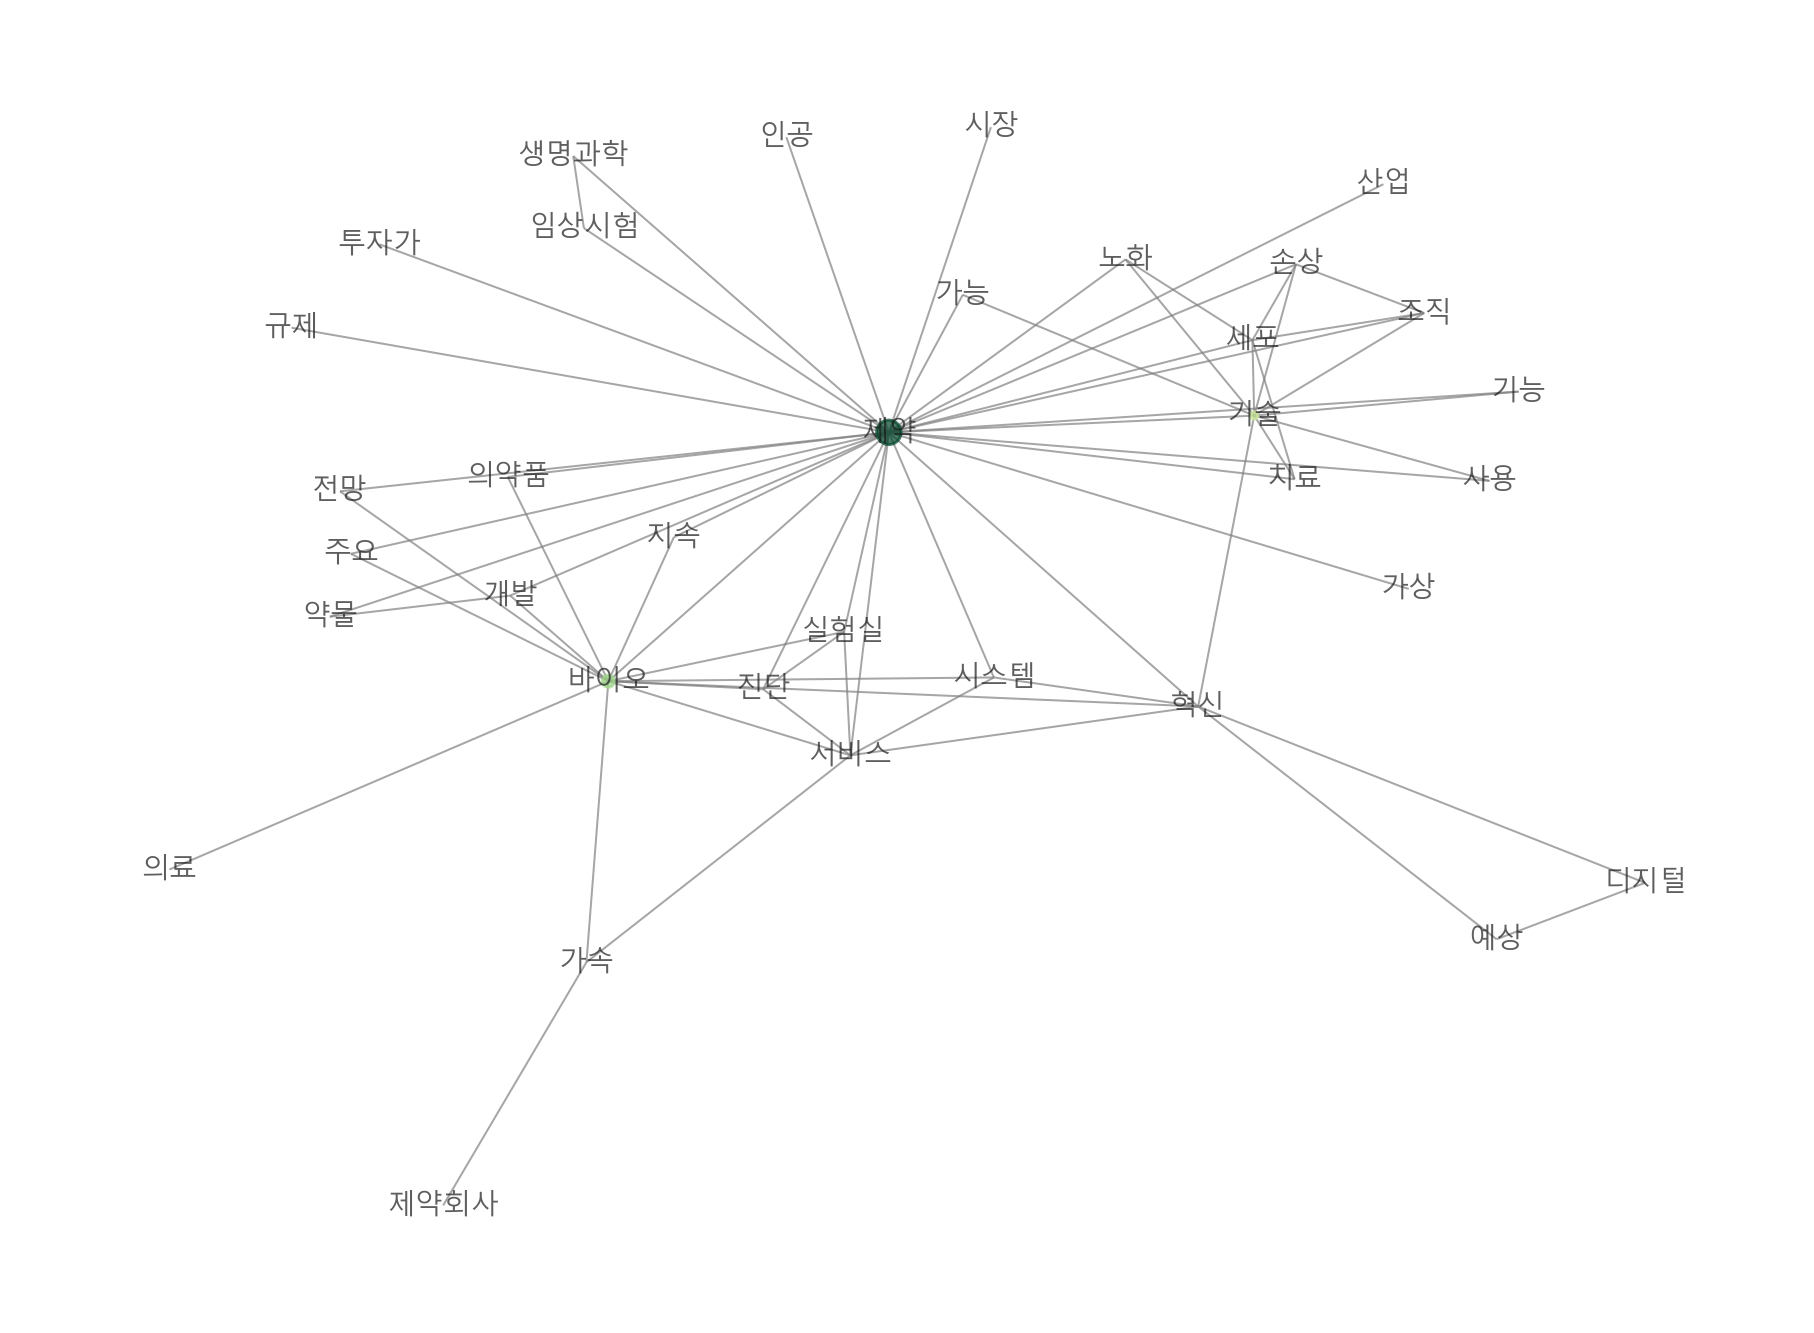

In [78]:
pos = nx.fruchterman_reingold_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

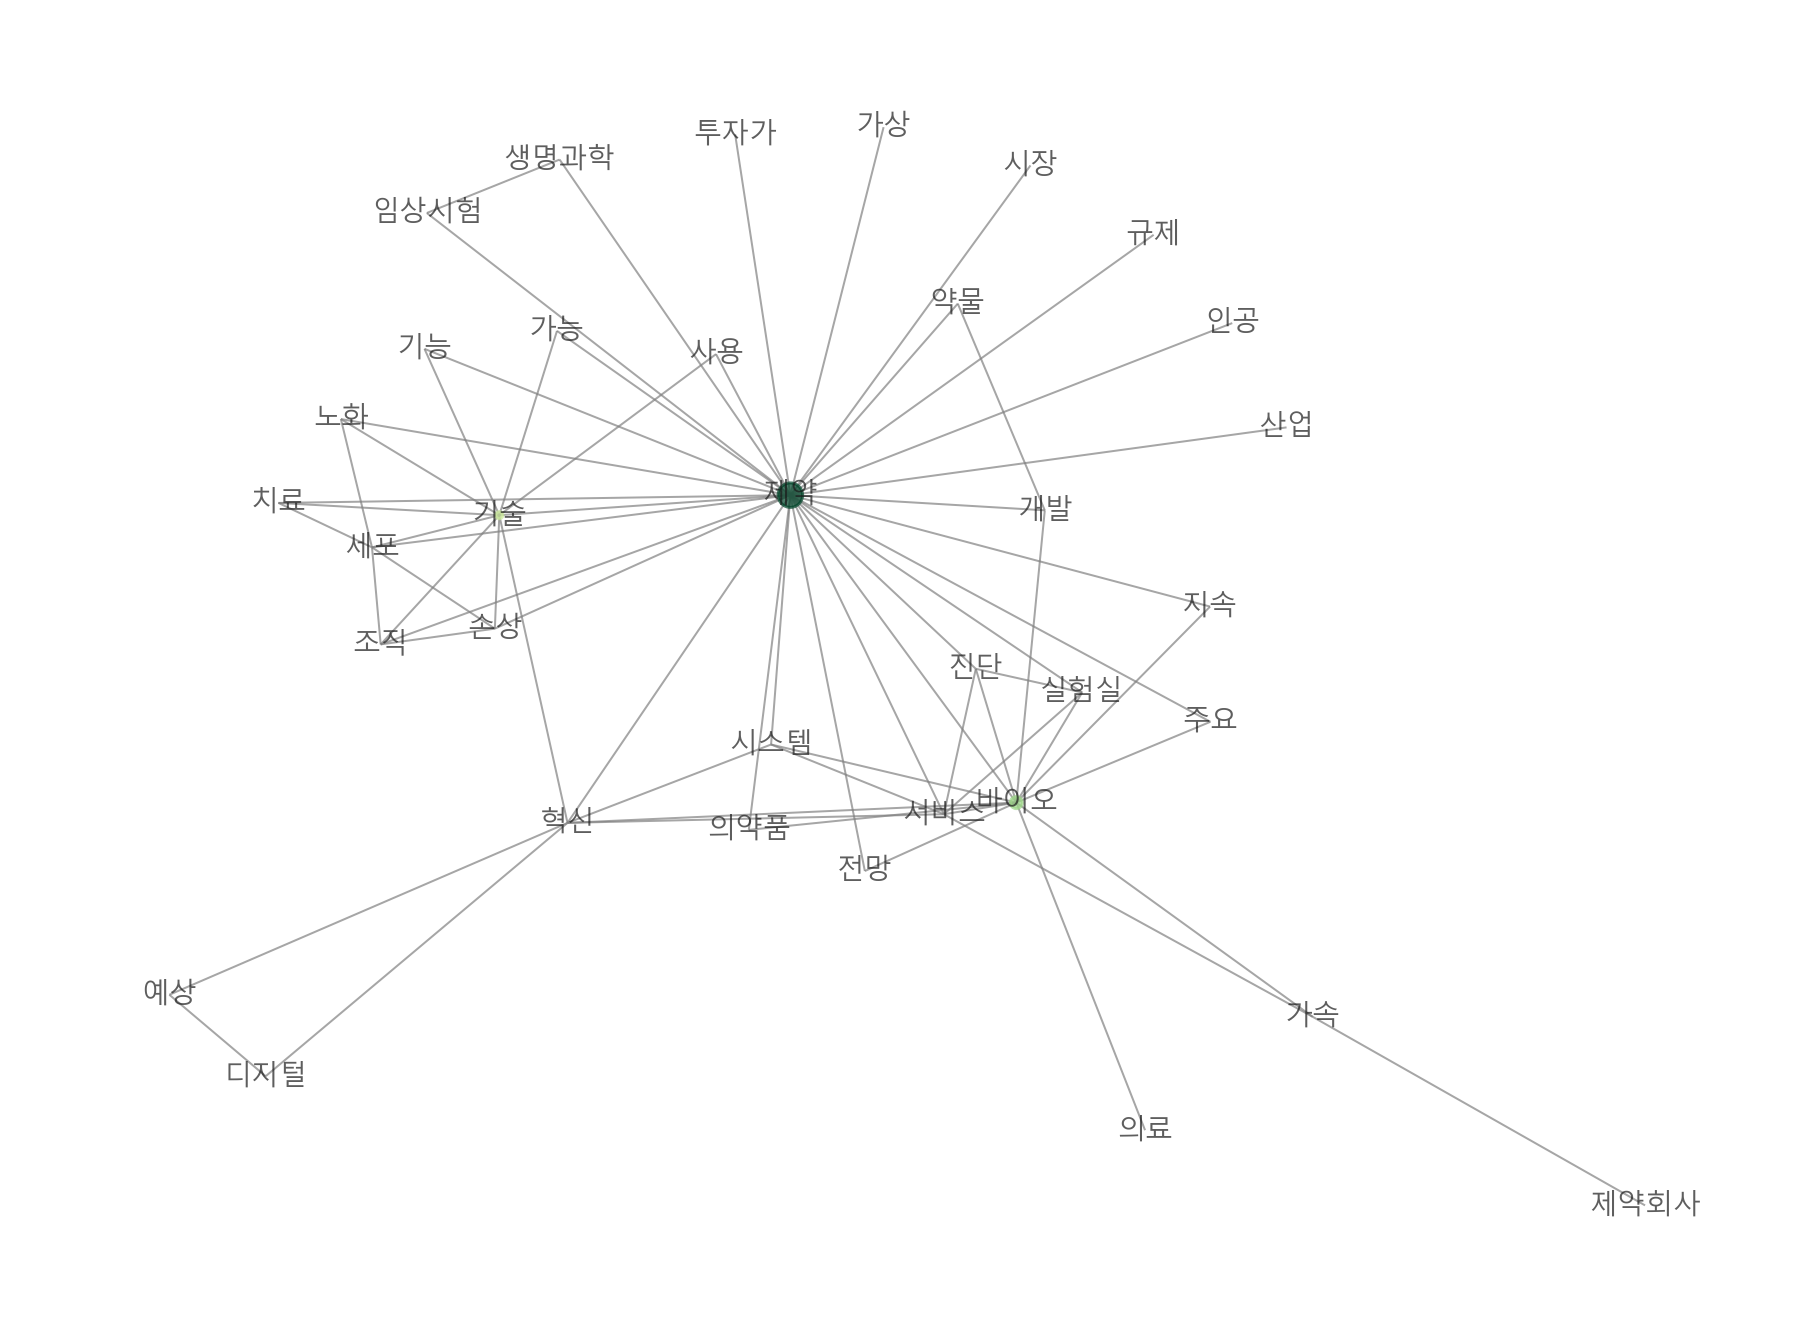

In [79]:
pos = nx.spring_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

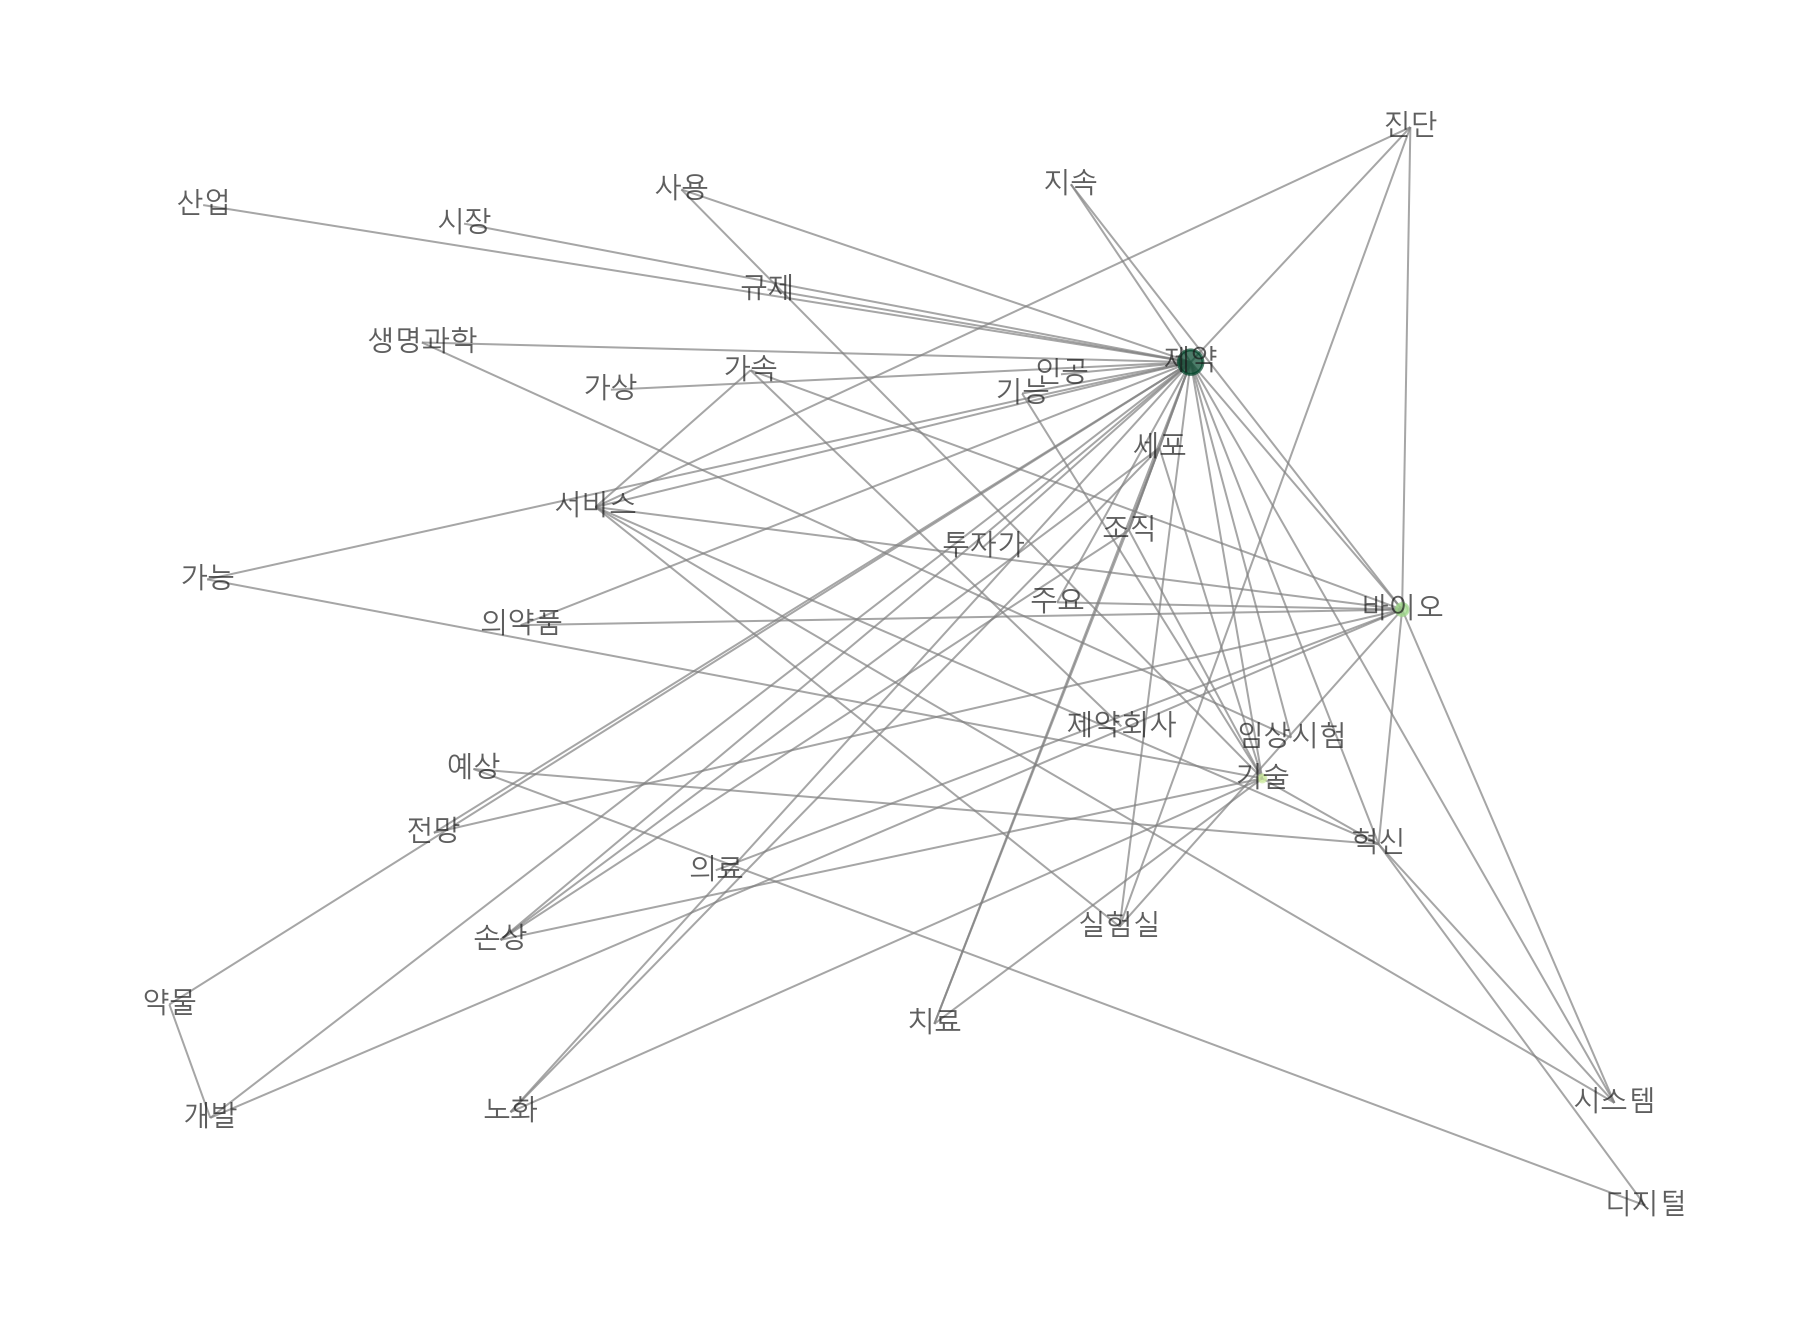

In [80]:
pos = nx.random_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning

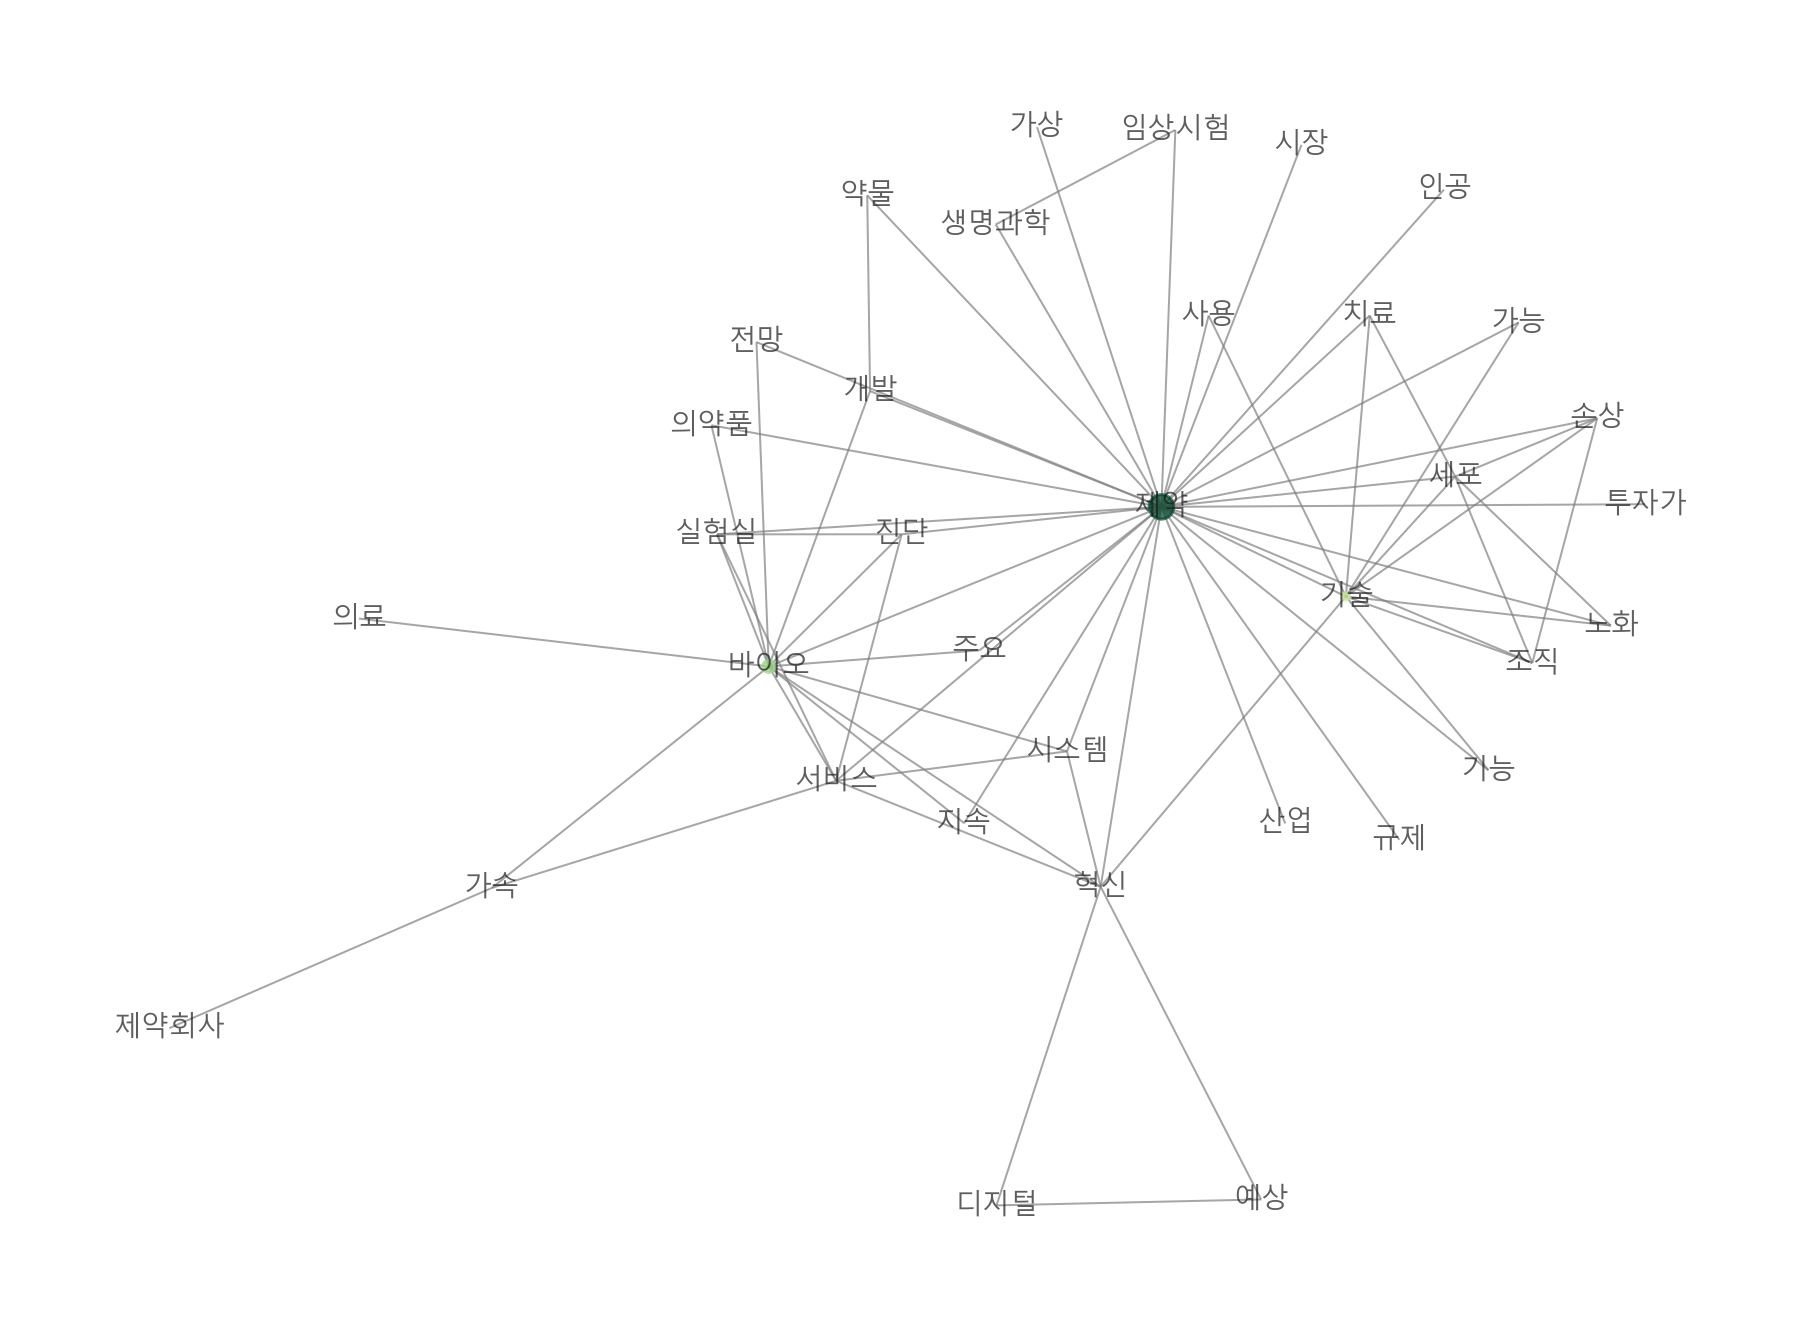

In [81]:
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

### CHECK

In [82]:
for i in clean_example:
    if '노화' in i:
        print('- ', i)

-  제약기술 사례세놀리틱스와 세포 노화 조절  세포 노화는 약물개발이 가능하지 않은 피할 수 없는 생리적 과정으로 간주됨  그러나 세놀리틱스는 세포 염증 기능 장애 및 조직 손상을 유발할 수 있는 노화 세포를 감소시키거나 제거가 가능
-  제약기술 노화 및 세포 노화 조절Senolytics and regulation of cellular aging
-  제약기술 노화를 지연시키는 세놀리틱스Senolytics은 세포 염증 기능 장애 조직 손상을 유발할 수 있는 노화 세포를 감소시키거나 제거가 가능
